<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

**Описание данных:**
- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
- **balcony** — число балконов
- **ceiling_height** — высота потолков (м)
- **cityCenters_nearest** — расстояние до центра города (м)
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
- **first_day_exposition** — дата публикации
- **floor** — этаж
- **floors_total** — всего этажей в доме
- **is_apartment** — апартаменты (булев тип)
- **kitchen_area** — площадь кухни в квадратных метрах (м²)
- **last_price** — цена на момент снятия с публикации
- **living_area** — жилая площадь в квадратных метрах (м²)
- **locality_name** — название населённого пункта
- **open_plan** — свободная планировка (булев тип)
- **parks_around3000** — число парков в радиусе 3 км
- **parks_nearest** — расстояние до ближайшего парка (м)
- **ponds_around3000** — число водоёмов в радиусе 3 км
- **ponds_nearest** — расстояние до ближайшего водоёма (м)
- **rooms** — число комнат
- **studio** — квартира-студия (булев тип)
- **total_area** — площадь квартиры в квадратных метрах (м²)
- **total_images** — число фотографий квартиры в объявлении

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# для работы с гугл диска, оставлю это здесь
#from google.colab import drive
#drive.mount('/content/gdrive')
#df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/project 3/real_estate_data.csv', sep='\t')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

В результате предварительного ознакомления мы видим, что данных много и они далеки от идеала. Требуется устранение пропусков, анализ выбросов. Каждый столбец требует отдельного подхода. Этим и займёмся.


## Предобработка данных

In [7]:
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True) #исправим название колонки cityCenters_nearest, чтобы всё было по фэн-шую

In [8]:
df.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
city_centers_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

Колонки
- total_images, 
- last_price, 
- total_area, 
- first_day_exposition, 
- rooms, 
- floor, 
- studio, 
- open_plan 

оставляем без изменений. В них нет пропусков. Позже к ним вернёмся для изменения типа.

- **locality_name**

In [10]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
#df['locality_name'].value_counts()
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Убрали букву "ё", немного помогло, 34 дубля пропало. Теперь удалим пропуски, т.к. их всего 49 из 23699. Так же при просмотре уникальных значений случайно заметил Мурино и Кудрово, исправим.

In [11]:
df = df.dropna(subset=['locality_name'])

In [12]:
df['locality_name'] = df['locality_name'].where(df['locality_name'] != 'поселок Мурино', 'Мурино')
df['locality_name'] = df['locality_name'].where(df['locality_name'] != 'деревня Кудрово', 'Кудрово')

In [13]:
df['locality_name'].value_counts()

Санкт-Петербург                       15721
Мурино                                  590
Кудрово                                 472
поселок Шушары                          440
Всеволожск                              398
                                      ...  
садовое товарищество Приладожский         1
поселок Коммунары                         1
коттеджный поселок Кивеннапа Север        1
деревня Трубников Бор                     1
деревня Котлы                             1
Name: locality_name, Length: 328, dtype: int64

- **floors_total**

In [14]:
df = df.dropna(subset=['floors_total'])

Так как нам нужно будет ответить на вопрос о зависимости цены от этажа, то с пропусками в этом столбце нужно что-то сделать. Так как их очень мало от общего числа, то проще всего их удалить. Это и сделаем. Но если бы пропусков было больше, то можно было бы их заполнить так: 1) Так как это Питер: вычислить где находится дом, по расстоянию от центра города и заполнить средним по группам по расстоянию до центра. Если значение удаленности от центра не заполнено, то смотреть по наименованию населенного пункта. 2) формально: добавить к floor + 1 этаж и записать в этот столбец. Мы просто удалим.

- **living_area, kitchen_area**

In [15]:
print('Количество NaN по kitchen_area:', df['kitchen_area'].isna().sum())
print('Количество NaN по living_area:', df['living_area'].isna().sum())

Количество NaN по kitchen_area: 2222
Количество NaN по living_area: 1865


In [16]:
print('Количество NaN по kitchen_area и living_area:',(df['living_area'].isna() & df['kitchen_area'].isna()).sum())

Количество NaN по kitchen_area и living_area: 1427


In [17]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] - df['living_area'])
df['living_area'] = df['living_area'].fillna(df['total_area'] - df['kitchen_area'])

Заполнять эти колонки средними значениями считаю не правильным, так как не от чего оттолкнуться. Если бы у нас был тип дома, тогда можно было бы что-то сказать. Заполним жилую площадь и кухню вычитая их из общей. Таким образом у нас осталось 1427 пропущенных значений. С ними ничего не поделаешь, оставляем как есть.

In [18]:
df.isna().sum().sort_values()

total_images                0
locality_name               0
open_plan                   0
floor                       0
floors_total                0
studio                      0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
living_area              1427
kitchen_area             1427
days_exposition          3171
parks_around3000         5500
ponds_around3000         5500
city_centers_nearest     5501
airports_nearest         5524
ceiling_height           9084
balcony                 11475
ponds_nearest           14529
parks_nearest           15535
is_apartment            20805
dtype: int64

- **is_apartment**

In [19]:
print('Количество пропусков:', df['is_apartment'].isna().sum())
df['is_apartment'].value_counts()

Количество пропусков: 20805


False    2710
True       50
Name: is_apartment, dtype: int64

Пропусков много. Апартаменты в нашей стране только набирают популярность (и это еще громко сказано), и многие не знают как правильно тут заполнять и поэтому предположим, что пропуски - это "не апартаменты", т.е. жилая недвижимость. Заполним False. 

In [20]:
df['is_apartment'] = df['is_apartment'].fillna(False)

- **balcony**

Предположим что пропуски в балконах - это отсутствие балконов. Заменяем на 0.

In [21]:
df['balcony'] = df['balcony'].fillna(0)

- **days_exposition**

Пропущенные значения заполнять средним неправильно. Может это еще не снятые объявления? Оставляем как есть.

- **ceiling_height**

Заполним отсутствующие значения средним показателем, 2,77 метра. Всё таки высота потолков не самый важный параметр.

In [22]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.77)

- **city_centers_nearest, airports_nearest** 

Проверим гипотезу о том, что пропущенные значения близости к аэропорту и центру относятся к области и окраинам Питера.

In [24]:
df.query('locality_name == "Санкт-Петербург" & city_centers_nearest == "nan" & airports_nearest == "nan"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Видно, что у нас всего 60 пропусков в этих столбцах относящихся к Питеру. Остальное область, поэтому пропуски в этих столбцах трогать не будем.

- **parks_nearest, ponds_nearest, parks_around3000, ponds_around3000**

Колонки с парками и прудами трогать не будем. Не самый важный показатель.

## Расчёты и добавление результатов в таблицу

**Приведение типов данных**

Здесь мы будем менять тип данных и добавлять новые колонки.

In [25]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           22138 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          22138 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.77,11.0,18.6,1,False,...,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.77,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.77,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Что и как будем менять:
- last_price - в int, обойдемся без копеек
- total_area, living_area, kitchen_area	- округлим до 1 знака, после запятой
- first_day_exposition - приведем к формату даты
- ceiling_height - округлим до 2 знаков, после запятой
- floors_total, balcony - к целочисленным значениям
- airports_nearest, city_centers_nearest, parks_around3000, parks_nearest,ponds_around3000, ponds_nearest - тут метры и штуки, к целочисленным значениям
- days_exposition - число дней, в int

In [26]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [27]:
df['day_of_week_exposition'] = df['first_day_exposition'].dt.day_name() # Теперь добавлю колонки c днем, месяцем и годом
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year

In [28]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

df['floor_group'] = df.apply(floor_group, axis=1)

In [29]:
df['price_per_meter'] = df['last_price'] / df['total_area']

In [30]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day_of_week_exposition,month_exposition,year_exposition,floor_group,price_per_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,Thursday,March,2019,другой,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.77,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,Tuesday,December,2018,первый,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.77,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,Thursday,August,2015,другой,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.77,14.0,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,Friday,July,2015,другой,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,Tuesday,June,2018,другой,100000.000000


In [31]:
list_to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'city_centers_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'price_per_meter']

In [32]:
for column in list_to_int:
    df[column] = df[df[column].notna()][column].astype('int')

In [33]:
list_to_float = ['total_area', 'living_area', 'kitchen_area', 'ceiling_height']

In [34]:
for column in list_to_float:
    df[column] = df[df[column].notna()][column].round(1)

In [35]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day_of_week_exposition,month_exposition,year_exposition,floor_group,price_per_meter
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,Thursday,March,2019,другой,120370
1,7,3350000,40.4,2018-12-04,1,2.8,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,Tuesday,December,2018,первый,82920
2,10,5196000,56.0,2015-08-20,2,2.8,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,Thursday,August,2015,другой,92785
3,0,64900000,159.0,2015-07-24,3,2.8,14,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,Friday,July,2015,другой,408176
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,Tuesday,June,2018,другой,100000


In [36]:
df['total_living_area'] = df['living_area'] / df['total_area']
df['total_kitchen_area'] = df['kitchen_area'] / df['total_area']

## Исследовательский анализ данных

**1) Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.**

In [37]:
df[['total_area','last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23565.000000,2.356500e+04,23565.000000,23565.000000
mean,60.322813,6.540058e+06,2.070656,2.784944
std,35.657072,1.091093e+07,1.078591,0.989254
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.646000e+06,2.000000,2.800000
75%,69.700000,6.790000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


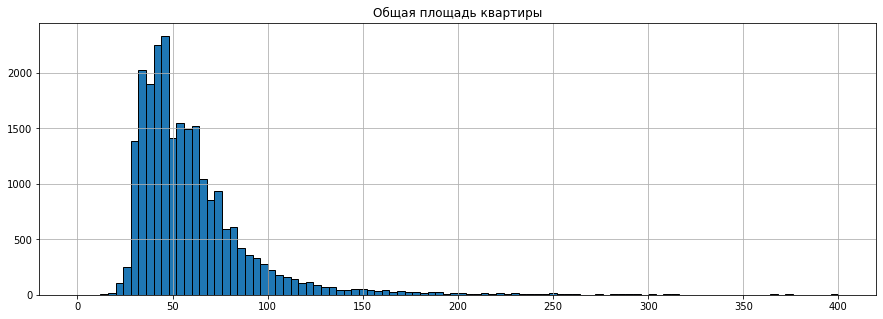

In [38]:
df['total_area'].hist(bins=100, range=(0,400), figsize=(15,5), ec='black')
plt.title('Общая площадь квартиры')
plt.show()

In [39]:
df[df['total_area']>400] #хочу поближе посмотреть на большие площади

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,day_of_week_exposition,month_exposition,year_exposition,floor_group,price_per_meter,total_living_area,total_kitchen_area
660,3,49950000,483.9,2017-10-04,7,3.2,6,312.5,4,False,...,3.0,22.0,391.0,Wednesday,October,2017,другой,103223,0.645795,0.054557
3117,19,140000000,631.0,2019-03-30,7,2.8,5,571.0,5,False,...,2.0,210.0,NaN,Saturday,March,2019,последний,221870,0.904913,0.095087
3676,12,28789000,442.0,2019-01-23,4,2.8,6,406.9,6,False,...,0.0,NaN,NaN,Wednesday,January,2019,последний,65136,0.920588,0.079186
4237,1,50000000,517.0,2017-10-14,7,2.8,4,332.0,3,False,...,2.0,540.0,NaN,Saturday,October,2017,другой,96711,0.642166,0.042553
5358,20,65000000,590.0,2019-02-14,15,3.5,6,409.0,3,False,...,0.0,NaN,14.0,Thursday,February,2019,другой,110169,0.693220,0.169492
5893,3,230000000,500.0,2017-05-31,6,2.8,7,460.0,7,False,...,2.0,198.0,50.0,Wednesday,May,2017,последний,460000,0.920000,0.080000
6221,8,34000000,470.3,2018-01-14,4,2.8,3,248.7,3,False,...,3.0,122.0,179.0,Sunday,January,2018,последний,72294,0.528811,0.085052
6621,20,99000000,488.0,2017-04-09,5,3.0,20,216.0,17,False,...,1.0,368.0,351.0,Sunday,April,2017,другой,202868,0.442623,0.102459
8018,20,84000000,507.0,2015-12-17,5,4.4,7,301.5,7,True,...,0.0,NaN,1078.0,Thursday,December,2015,последний,165680,0.594675,0.089744
9826,1,43185328,494.1,2017-05-12,1,2.8,12,NaN,3,False,...,0.0,NaN,5.0,Friday,May,2017,другой,87401,NaN,NaN


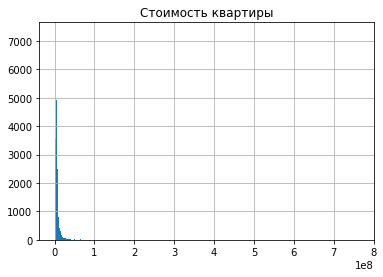

In [40]:
df['last_price'].hist(bins=500)
plt.title('Стоимость квартиры')
plt.show()

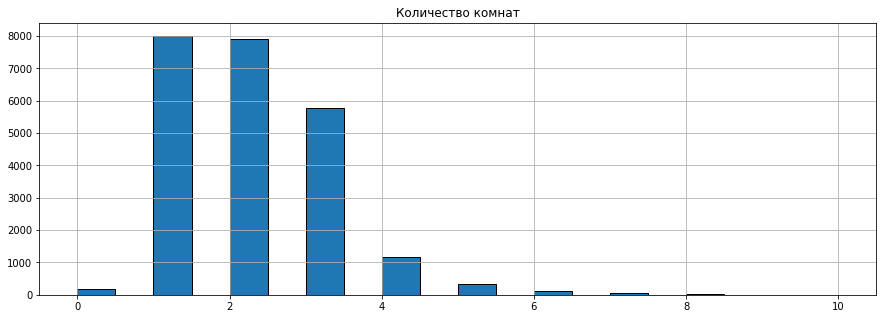

In [41]:
df['rooms'].hist(bins=20, range=(0,10), figsize=(15,5), ec='black')
plt.title('Количество комнат')
plt.show()

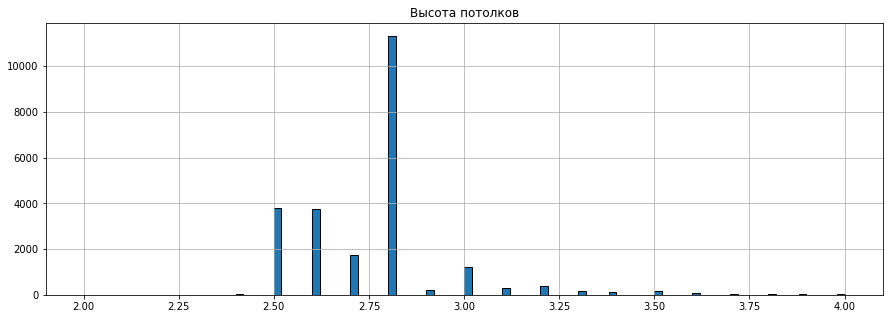

In [43]:
df['ceiling_height'].hist(bins=100, range=(2, 4), figsize=(15,5), ec='black')
plt.title('Высота потолков')
plt.show()

Вывод:
В результате проведенного анализа мы видим, что:
- минимальная площадь продаваемых квартир - 12 м2, максимальная - 900 м2.
- 900 м2 конечно смущает, но похоже продают целый этаж, 12 квартир по 75 метров.
- основная масса квартир от 30 до 70 м2.
- цены от 12 тысяч до 763 млн рублей.
- количество комнат от 0 до 19. Так как это Питер, то 19 комнат - это не аномалия, а простая Питерская коммуналка, видимо идет расселение. 0 - студия или свободная планировка.
- Больше всего однокомнатных и двухкомнатных квартир.
- Высота потолка в 100 метров немного смущает, надо будет исправить.

**2) Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**

In [44]:
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

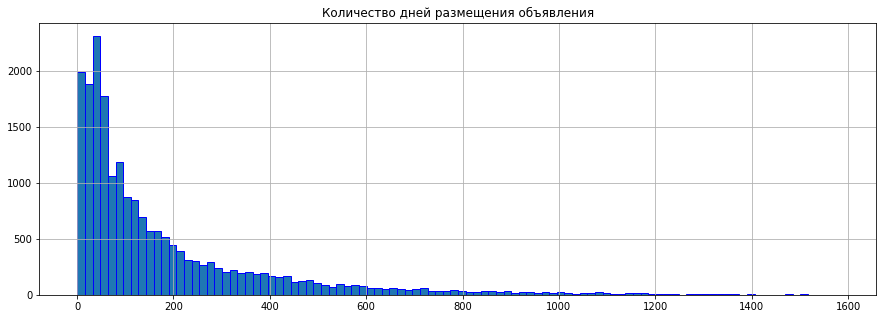

In [45]:
df['days_exposition'].hist(bins=100, figsize=(15, 5), ec='blue')
plt.title('Количество дней размещения объявления')
plt.show()

Среднее время размещения квартиры 180 дней (полгода), что вполне нормально.
Медианное значение - 95 дней.
Большая часть квартир размещается на три месяца.
Минимальный срок размещения - 1 день, максимальный - 1580 дней (четыре с небольшим лет).
Возможно длительные сроки продаж связаны с расселением коммуналок. Проверим.

Функция describe() просто великолепна, считает всё за нас. =)

In [46]:
df.query('days_exposition > 365 & rooms < 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,day_of_week_exposition,month_exposition,year_exposition,floor_group,price_per_meter,total_living_area,total_kitchen_area
2,10,5196000,56.0,2015-08-20,2,2.8,5,34.3,4,False,...,2.0,574.0,558.0,Thursday,August,2015,другой,92785,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.8,14,NaN,9,False,...,3.0,234.0,424.0,Friday,July,2015,другой,408176,NaN,NaN
13,20,3550000,42.8,2017-07-01,2,2.6,5,27.0,5,False,...,3.0,298.0,366.0,Saturday,July,2017,последний,82943,0.630841,0.121495
16,11,6700000,82.0,2017-11-23,3,3.0,5,55.6,1,False,...,0.0,NaN,397.0,Thursday,November,2017,первый,81707,0.678049,0.109756
17,6,4180000,36.0,2016-09-09,1,2.8,17,16.5,7,False,...,1.0,859.0,571.0,Friday,September,2016,другой,116111,0.458333,0.305556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23672,5,3000000,30.8,2016-06-08,1,2.8,5,16.1,3,False,...,0.0,NaN,808.0,Wednesday,June,2016,другой,97402,0.522727,0.204545
23675,8,3550000,39.5,2016-10-03,1,2.8,16,19.0,13,False,...,0.0,NaN,721.0,Monday,October,2016,другой,89873,0.481013,0.215190
23691,11,9470000,72.9,2016-10-13,2,2.8,25,40.3,7,False,...,1.0,806.0,519.0,Thursday,October,2016,другой,129903,0.552812,0.145405
23692,2,1350000,30.0,2017-07-07,1,2.8,5,17.5,4,False,...,NaN,NaN,413.0,Friday,July,2017,другой,45000,0.583333,0.200000


Видимо, длительное время продажи связано НЕ ТОЛЬКО лишь с коммуналками, что в-принципе логично. Квартиры с большим количество комнат и длительным сроком размещения встречаются слишком редко, что бы на что-то влиять. Можно их смело отсекать.

Посмотрим boxplot и определим границу выбросов.

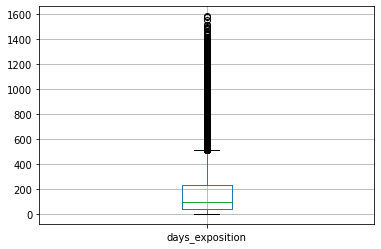

In [47]:
df.boxplot(column='days_exposition');

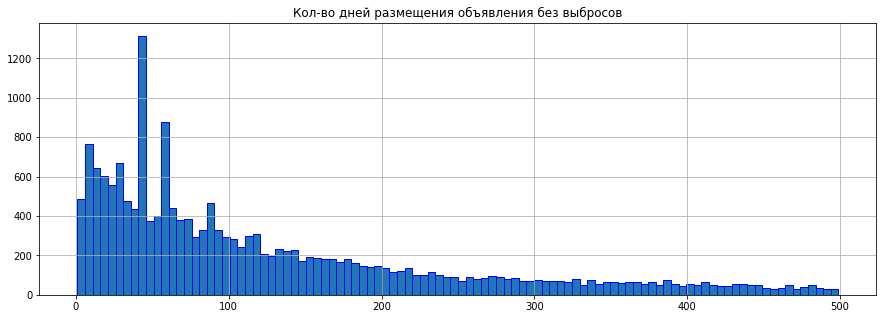

In [48]:
df.query('days_exposition < 500')['days_exposition'].hist(bins=100, figsize=(15, 5), ec='blue');
plt.title('Кол-во дней размещения объявления без выбросов')
plt.show()

Тут наметились выбросы. Нужно посмотреть поближе 

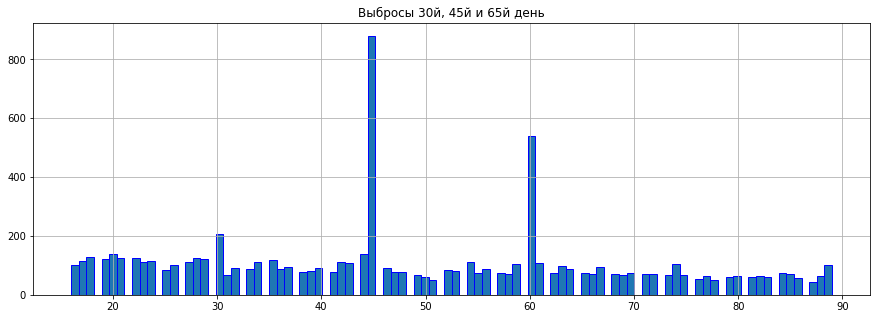

In [49]:
df.query('15 < days_exposition < 90')['days_exposition'].hist(bins=100, figsize=(15, 5), ec='blue')
plt.title('Выбросы 30й, 45й и 65й день')
plt.show()

Видим выбросы на 30й, 45й и 60й день. Скорее всего это автоматическое закрытие объявления. Например, на Авито этот срок 30 дней.

**3) Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.**

In [50]:
dfdf = df[['last_price', 'rooms', 'city_centers_nearest', 'total_area']]

In [51]:
dfdf.corr().style.background_gradient(cmap='coolwarm')

,last_price,rooms,city_centers_nearest,total_area
last_price,1.000000,0.363191,-0.206353,0.653621
rooms,0.363191,1.000000,-0.184096,0.758735
city_centers_nearest,-0.206353,-0.184096,1.000000,-0.231182
total_area,0.653621,0.758735,-0.231182,1.000000


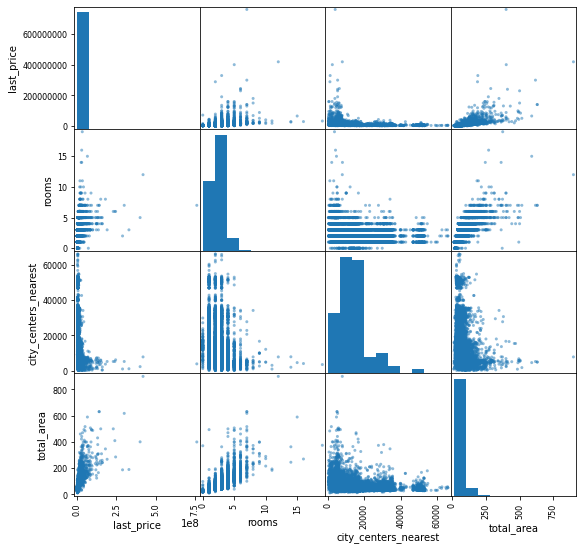

In [52]:
pd.plotting.scatter_matrix(dfdf, figsize=(9, 9)); #красиво, но ничего не понятно =)

Наблюдается слабая положительная корреляция между стоимостью и количеством комнат. Зато общая площадь влияет на стоимость уже гораздо больше,что в общем-то очевидно. Довольно очевидная зависимость и между расстоянием до центра. В центре квартиры дороже.

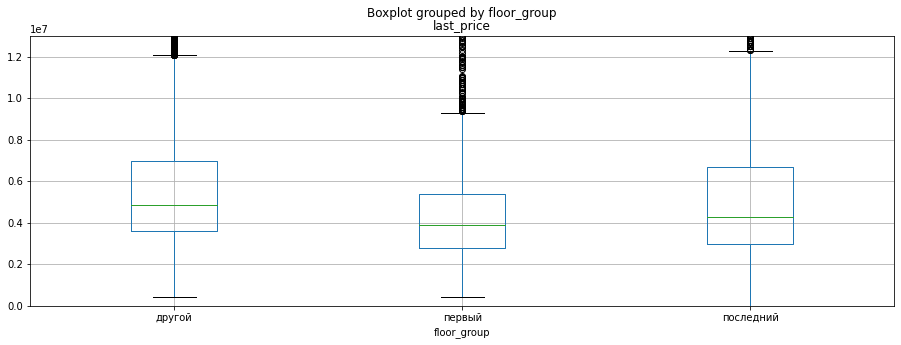

In [53]:
df.boxplot('last_price', by='floor_group',figsize=(15,5)).set_ylim(0,13000000);

Квартиры на первом этаже в среднем самые дешевые. Потом идёт последний этаж. Квартиры на других этажах в среднем дороже, чем на первом и последнем.

In [54]:
#df.head()

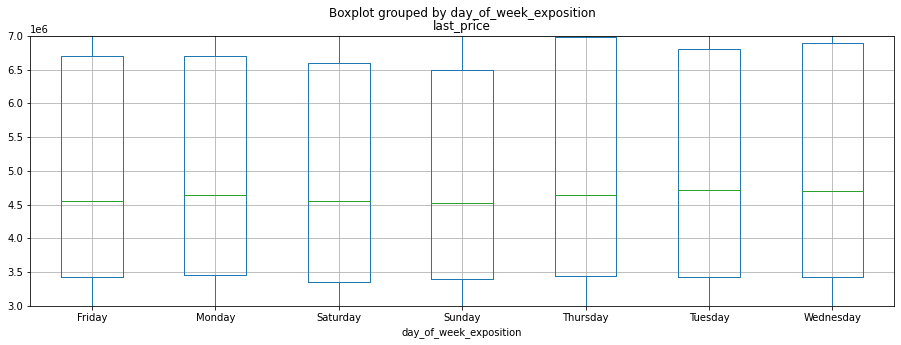

In [55]:
plot = df.boxplot('last_price', by='day_of_week_exposition',figsize=(15,5)).set_ylim(3000000,7000000);

Стоимость квартир размещенных в выходные дни незначительно ниже, чем в будние дни. 

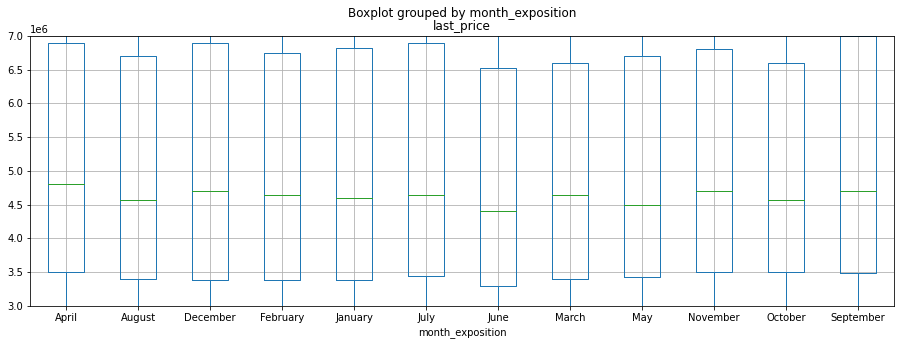

In [56]:
plot = df.boxplot('last_price', by='month_exposition',figsize=(15,5)).set_ylim(3000000,7000000)

Летом квартиры размещаются по наименьшей стоимости. Самая высокая стоимость осенью. Особенно выделяется апрель, самая большая медиана.

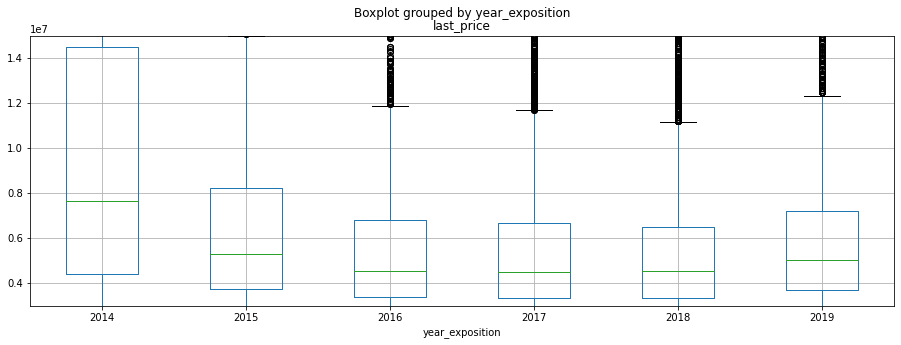

In [57]:
plot = df.boxplot('last_price', by='year_exposition',figsize=(15,5)).set_ylim(3000000,15000000)

Самая высокая стоимость квартир в 2014 году. А потом "КрымНаш" и ослабление рубля. В 2019 году рынок недвижимости стал понемногу расти.

**4) Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья.**

In [58]:
df.groupby('locality_name').agg({'last_price':'count', 'price_per_meter':'mean'}).sort_values(by='last_price', ascending=False).head(10)

,last_price,price_per_meter
locality_name,,
Санкт-Петербург,15651,114868.433902
Мурино,586,86040.658703
Кудрово,470,95260.393617
поселок Шушары,439,78550.883827
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
поселок Парголово,327,90175.489297
Гатчина,307,68745.693811


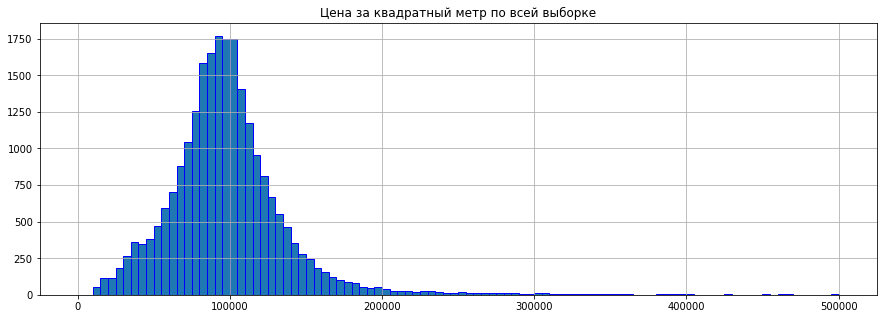

In [59]:
df['price_per_meter'].hist(bins=100, range=(0, 500000), figsize=(15, 5), ec='blue')
plt.title('Цена за квадратный метр по всей выборке')
plt.show()

Как и ожидалось в Питере средняя стоимость квадратного метра жилья выше, чем в других городах ЛО. 

Санкт-Петербург - 114 868 руб./м2

Выборг - 58 141 руб./м2

**5) Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.**

In [60]:
spb = df.query('locality_name == "Санкт-Петербург"')
spb.loc[:, 'center_city_km'] = (spb.loc[:, 'city_centers_nearest']/1000).round()
spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,day_of_week_exposition,month_exposition,year_exposition,floor_group,price_per_meter,total_living_area,total_kitchen_area,center_city_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,755.0,NaN,Thursday,March,2019,другой,120370,0.472222,0.231481,16.0
2,10,5196000,56.0,2015-08-20,2,2.8,5,34.3,4,False,...,574.0,558.0,Thursday,August,2015,другой,92785,0.612500,0.148214,14.0
3,0,64900000,159.0,2015-07-24,3,2.8,14,NaN,9,False,...,234.0,424.0,Friday,July,2015,другой,408176,NaN,NaN,7.0
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,48.0,121.0,Tuesday,June,2018,другой,100000,0.320000,0.410000,8.0
7,5,7915000,71.6,2019-04-18,2,2.8,24,52.7,22,False,...,NaN,NaN,Thursday,April,2019,другой,110544,0.736034,0.263966,12.0


<AxesSubplot:xlabel='center_city_km'>

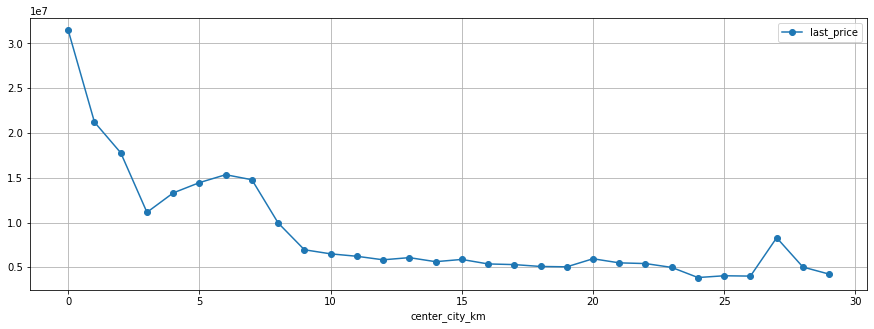

In [61]:
(spb.pivot_table(index='center_city_km', values='last_price', aggfunc='mean').plot(style='o-', grid=True, figsize=(15,5)))

Основываясь на графике выше можно сказать, что центр Питера ограничен радиусом в 3 км, так как на этой границе идёт резкий спад цены. Затем примерно на 8 км видно окраины Питера. Потом начинается область. Есть странный выброс на 27 км. Возможно это Кронштадт, Пушкин или Колпино. Просто продавцы указали в названии города - Санкт-Петербург.

**6) Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?**

In [62]:
center_spb = spb.query('center_city_km <= 3')
#center_spb_corr = center_spb[['total_area', 'last_price', 'ceiling_height', 'rooms']]

In [63]:
#center_spb_corr.corr()

In [64]:
#pd.plotting.scatter_matrix(center_spb_corr, figsize=(9, 9))
df[['total_area','last_price', 'rooms', 'ceiling_height']].describe().round(2)

,total_area,last_price,rooms,ceiling_height
count,23565.00,2.356500e+04,23565.00,23565.00
mean,60.32,6.540058e+06,2.07,2.78
std,35.66,1.091093e+07,1.08,0.99
min,12.00,1.219000e+04,0.00,1.00
25%,40.00,3.400000e+06,1.00,2.60
50%,52.00,4.646000e+06,2.00,2.80
75%,69.70,6.790000e+06,3.00,2.80
max,900.00,7.630000e+08,19.00,100.00


In [65]:
center_spb[['total_area','last_price', 'rooms', 'ceiling_height']].describe().round(2)

,total_area,last_price,rooms,ceiling_height
count,877.00,8.770000e+02,877.00,877.00
mean,98.63,1.631814e+07,3.11,3.12
std,56.56,2.648425e+07,1.49,0.89
min,12.00,2.100000e+06,0.00,2.50
25%,63.30,7.300000e+06,2.00,2.80
50%,85.00,9.800000e+06,3.00,3.00
75%,116.50,1.500000e+07,4.00,3.30
max,517.00,4.013000e+08,14.00,27.00


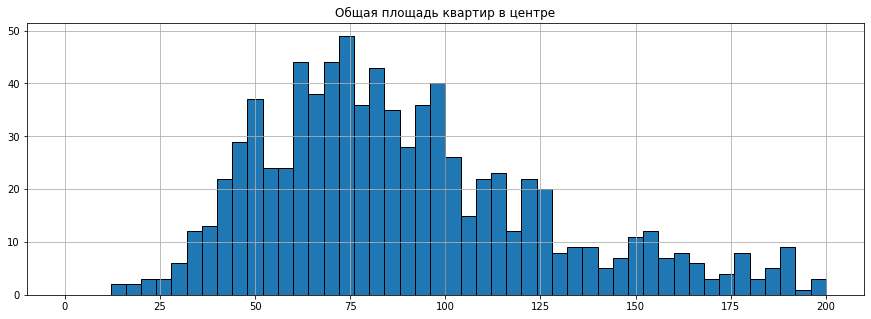

In [66]:
center_spb['total_area'].hist(bins=50, range=(0,200), figsize=(15,5), ec='black')
plt.title('Общая площадь квартир в центре')
plt.show()

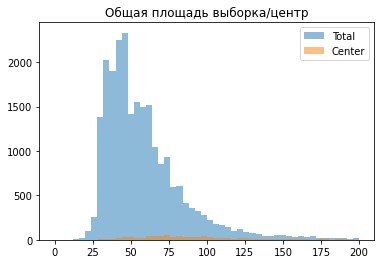

In [67]:
plt.hist(df['total_area'], bins = 50, range=(0,200), alpha=0.5, label='Total',)
plt.hist(center_spb['total_area'], bins = 50, range=(0,200), alpha=0.5, label='Center',)
plt.legend(loc='upper right')
plt.title('Общая площадь выборка/центр')
plt.show()

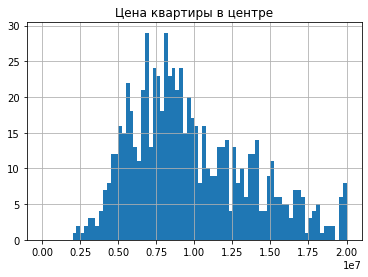

In [68]:
center_spb['last_price'].hist(bins=80, range=(0, 20000000))
plt.title('Цена квартиры в центре')
plt.show()

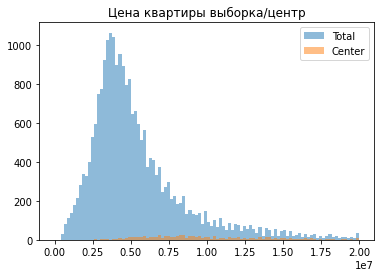

In [69]:
plt.hist(df['last_price'], bins = 100, range=(0,20000000), alpha=0.5, label='Total',)
plt.hist(center_spb['last_price'], bins = 100, range=(0,20000000), alpha=0.5, label='Center',)
plt.legend(loc='upper right')
plt.title('Цена квартиры выборка/центр')
plt.show()

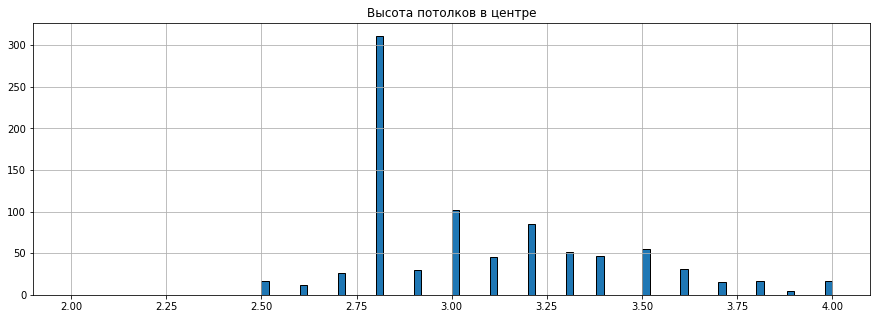

In [70]:
center_spb['ceiling_height'].hist(bins=100, range=(2, 4), figsize=(15,5), ec='black')
plt.title('Высота потолков в центре')
plt.show()

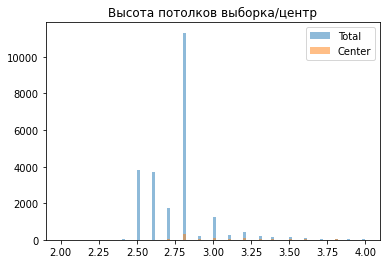

In [71]:
plt.hist(df['ceiling_height'], bins = 100, range=(2, 4), alpha=0.5, label='Total',)
plt.hist(center_spb['ceiling_height'], bins = 100, range=(2, 4), alpha=0.5, label='Center',)
plt.legend(loc='upper right')
plt.title('Высота потолков выборка/центр')
plt.show()

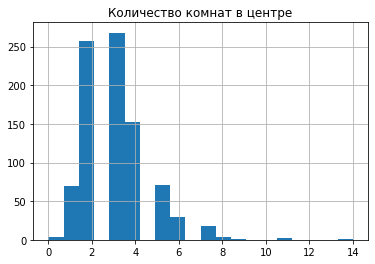

In [72]:
center_spb['rooms'].hist(bins=20)
plt.title('Количество комнат в центре')
plt.show()

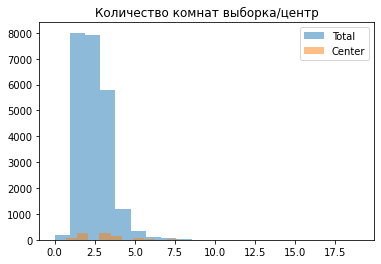

In [73]:
plt.hist(df['rooms'], bins = 20, alpha=0.5, label='Total',)
plt.hist(center_spb['rooms'], bins = 20, alpha=0.5, label='Center',)
plt.legend(loc='upper right')
plt.title('Количество комнат выборка/центр')
plt.show()

Из-за большой разницы в количестве графики выглядят не очень наглядно, но и по ним можно утверждать что в центре Санкт-Петербурга квартиры стоят дороже, в среднем комнат в них больше,а потолки выше.

In [74]:
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [75]:
center_spb['days_exposition'].describe()

count     715.000000
mean      251.525874
std       275.854898
min         3.000000
25%        61.000000
50%       140.000000
75%       363.000000
max      1572.000000
Name: days_exposition, dtype: float64

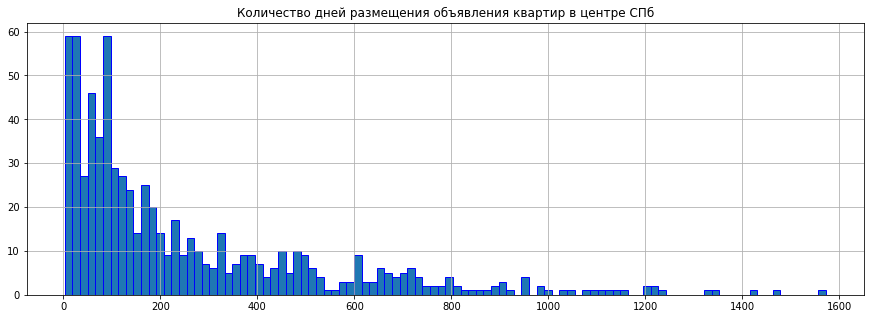

In [76]:
center_spb['days_exposition'].hist(bins=100, figsize=(15, 5), ec='blue');
plt.title('Количество дней размещения объявления квартир в центре СПб')
plt.show()

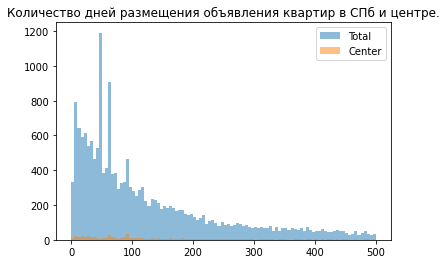

In [77]:
plt.hist(df['days_exposition'], bins = 100, alpha=0.5, range=(0,500), label='Total',)
plt.hist(center_spb['days_exposition'], bins = 100, alpha=0.5, range=(0,500), label='Center',)
plt.legend(loc='upper right')
plt.title('Количество дней размещения объявления квартир в СПб и центре.')
plt.show()

В центре квартиры в среднем продаются дольше.

## Общий вывод

Исходя из проведенного анализа можно сказать следующее:
- Чем больше площадь, тем больше цена.
- Квартиры с лучшим соотношение жилой площади/кухни стоят дороже.
- Количество комнат влияет на цену, чем больше, тем выше.
- Квартиры на первом этаже дешевле прочих.
- В центре СПб квартиры дороже, чем на окраинах. Независимо от площади.
- Квартиры выставленные на продажу летом в среднем дешевле, чем в остальном году.
- 2014 год стал переломным, квартиры после 2014 резко подешевели.